# Matplotlib 簡介與常用技巧

## 通用技巧

### Importing Matplotlib

* 標準的簡寫是 `mpl` 和 `plt`

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Setting Styles

* 繪圖的風格，可以用 `plt.style` 來設定，我們先用經典款 (`classic`) 的風格，就會很 matplotlib: 

In [2]:
plt.style.use('classic')

### ``show()`` or No ``show()``?

* 有三個環境可以讓你用 matplotlib. 
  * `.py` 的 script 中. 
  * `IPython` 的 terminal 中. 
  * `Jupyter Notebook` 中。

#### 在 `.py` 文件中，要用 `plt.show()`. 

* 如果是在 script 中使用 matplotlib，就可以善用 `plt.show()`。執行 code 後，他會彈出視窗來顯示。  
* 舉例來說，我有一個 `myplot.py` 這個 script 如下

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

* 那我在 terminal 去 run 這個 script時，就會彈出視窗

```
$ python myplot.py
```

* `plt.show()` 在做的是，開啟一個事件迴圈，檢查目前活躍中的圖表物件，然後開啟一個交互式的視窗來顯示圖表  
* 要注意的是，`plt.show()`在每個 python session 中，只會使用一次，通常都放在 script 的最末端。避免寫多個 `plt.show()`

#### 在 IPython shell中，用 `%matplotlib` 就好，不用 `plt.show()`

* 在 Ipython shell 中，可以用 `%matplotlib` 這個 magic command，例如以下：

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

* 之後就不需要再下 `plt.show()` 了。你每次的繪圖，他都會開啟圖表視窗。  

#### 在 Jupyter notbooke 中，用 `%matplotlib inline` 將靜態圖型嵌入

* 用 `%matplotlib inline`，可把靜態圖型嵌入，就不需要 `plt.show()` 了. 
* 用 `%matplotlib notebook`，可把互動式圖型嵌入，也不需要 `plt.show()`. 
* 直接來看例子：

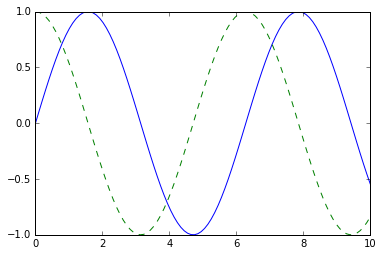

In [3]:
%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

* 當我們用 `fig = plt.figure()` 去 initialize 一個 instance後，就可以用 `fig.savefig()`，把圖片存成各種格式 (e.g. `jpeg`, `jpg`, `png`, `pdf`, ...;)  
* 要注意的是，不需要再寫 `plt.show()` 了

In [4]:
fig.savefig('figures/my_figure.png')

* 我們可以用 `IPython.display` 裡面的 `Image` function，來讀取圖片檔，驗證看看我剛剛寫出來的圖片：

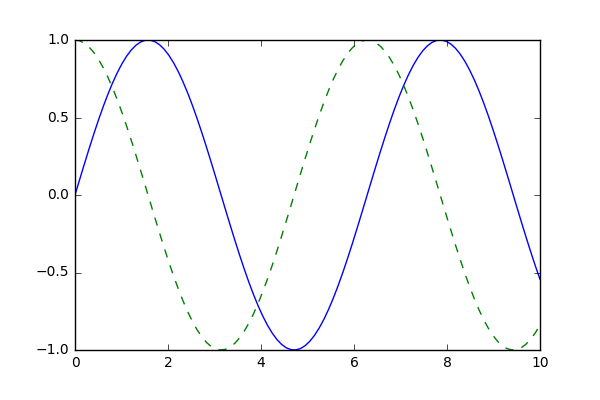

In [5]:
from IPython.display import Image
Image('figures/my_figure.png')

在 `savefig()` 中，靠副檔名來得知要存成啥格式。有許多不同檔案格式可以用，我們可透過 `cavas` 物件的 `get_supported_filetypes()` 這個 method，來看看支援哪些格式：

In [6]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Matplotlib 的雙介面

* matplotlib的雙介面蠻容易讓人搞混的：  
  * MATLAB-style state-based interface (就是我們最常看到的那種)
  * 物件導向的 interface. 
* 我們很快的來比較一下：  

### MATLAB-style Interface

* Matplotlib原本是寫給 Python user 的一個 MATLAB 介面，所以語法都很像。  
* 例如下面的例子，就超 MATLAB

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.352273)


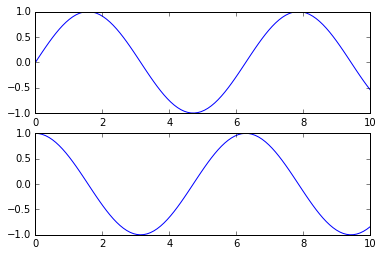

In [7]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

print(plt.gcf())
print(plt.gca())

* 這邊要注意的是，這個 interface 是 `stateful`： 他會 keeps track of the "current" figure and axes。  
* 例如，你可以用 `plt.gcf()`去 get current figure; 用 `plt.gca()` 去 get current axes 
* 儘管這種 stateful interface 拿來畫簡單的圖形時，又快又方便，但也很容易遇到問題。  
* 例如，當你畫好 second panel 後，你要怎麼去改 first panel？  
* 事實上是可以改，只是很難改。所以，就有另一種 interface 的出現 -> OOP 的介面

### Object-oriented interface

* 物件導向的介面，可以讓你畫出更複雜的圖，也讓你對圖表又更多的控制
* 舉例如下：

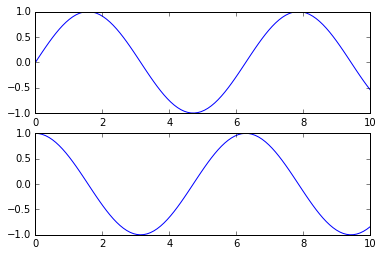

In [8]:
# First create a grid of plots
# ax 是一個 array，裡面放 2 個 axis objects 
fig, ax = plt.subplots(2)

# 在適當的物件上，呼叫 plot() method
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

* 從 syntax 來看，可以發現，用 `plt.subplots()` 後，就得到 fig 和 ax 兩個物件。後續就是用這些物件的 method 來畫  
* 至於要用哪一種介面，就看問題的情況。之後會有很多例子來練習。從 code 的角度來看，也僅僅是 `plt.plot()` 或是 `ax.plot()` 的差別而已。